**MACHINE LEARNING**

<br>

- In this segment, we will model and analysis the results we got from a decision tree classification and Support Vector classification

Import necessary libraries for classification

In [1]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
    
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

Import the final cleaned dataframe

In [2]:
micheline_final_df = pd.read_csv('CLEAN.csv')

Creating Train-Test split, while to changing categorical data to numeric

In [8]:
micheline_X_raw = pd.DataFrame(micheline_final_df[['Cuisine', 'Country']].astype('category'))

micheline_X_raw.dtypes

temp = [];
temp.append(micheline_X_raw['Cuisine'].cat.codes)
temp.append(micheline_final_df['USDPrice'])
temp.append(micheline_X_raw['Country'].cat.codes)
transpose = np.transpose(temp)

micheline_X = pd.DataFrame(transpose)
micheline_X.dtypes

micheline_y = pd.DataFrame(micheline_final_df['Award'].astype('category'))
X_train, X_test, y_train, y_test = train_test_split(micheline_X, micheline_y, test_size = 0.2)

First classification tech: Decision Tree Classification

In [9]:
from sklearn.tree import DecisionTreeClassifier

dectree = DecisionTreeClassifier(max_depth = 4)
dectree.fit(X_train, y_train)

y_train_pred_dectree = dectree.predict(X_train)
y_test_pred_dectree = dectree.predict(X_test)

Plot out confusion matrix for Train and Test

Goodness of Fit of Model 	Train Dataset
Classification Accuracy 	: 0.8328149300155521

Goodness of Fit of Model 	Test Dataset
Classification Accuracy 	: 0.8320373250388803



<AxesSubplot:>

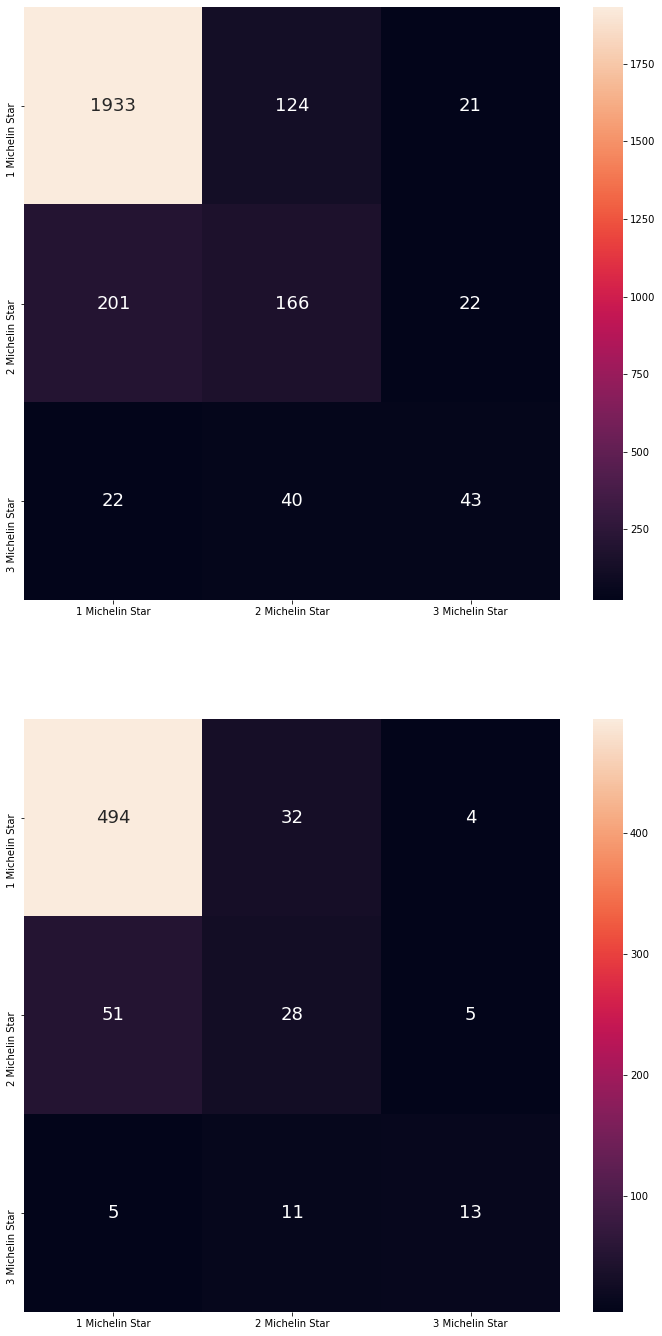

In [10]:
# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Classification Accuracy \t:", dectree.score(X_train, y_train))
print()

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Classification Accuracy \t:", dectree.score(X_test, y_test))
print()

x_axis_labels = ['1 Michelin Star', '2 Michelin Star', '3 Michelin Star']
y_axis_labels = ['1 Michelin Star', '2 Michelin Star', '3 Michelin Star']
# Plot the Confusion Matrix for Train and Test
f, axes = plt.subplots(2, 1, figsize=(12, 24))
sb.heatmap(confusion_matrix(y_train, y_train_pred_dectree), xticklabels=x_axis_labels,
           yticklabels=y_axis_labels,
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[0])
sb.heatmap(confusion_matrix(y_test, y_test_pred_dectree), xticklabels=x_axis_labels,
           yticklabels=y_axis_labels,
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[1])

Second Classification tech: Support Vector Classification

In [6]:
from sklearn.svm import SVC

clf = SVC()
clf.fit(X_train, y_train)

y_train_pred_clf = clf.predict(X_train)
y_test_pred_clf = clf.predict(X_test)

/Users/sean/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


Plot out confusion matrix for Train and Test

Goodness of Fit of Model 	Train Dataset
Classification Accuracy 	: 0.833592534992224

Goodness of Fit of Model 	Test Dataset
Classification Accuracy 	: 0.8118195956454122



<AxesSubplot:>

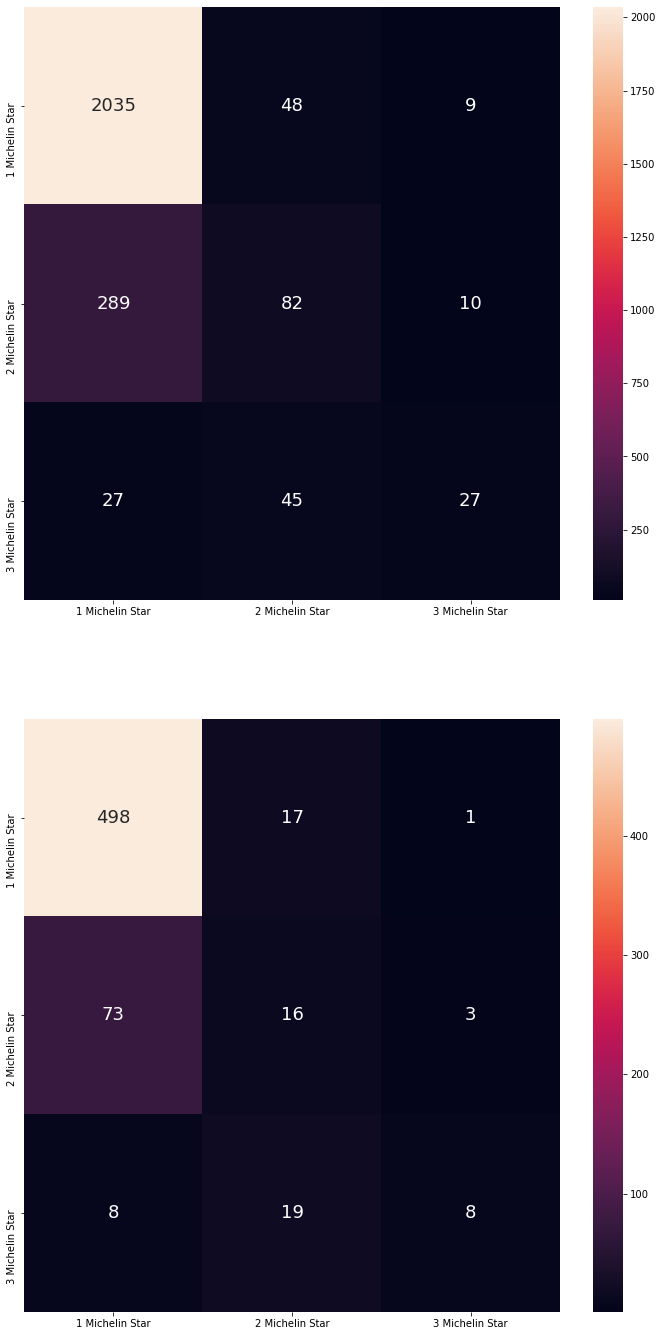

In [7]:
# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Classification Accuracy \t:", clf.score(X_train, y_train))
print()

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Classification Accuracy \t:", clf.score(X_test, y_test))
print()

x_axis_labels = ['1 Michelin Star', '2 Michelin Star', '3 Michelin Star']
y_axis_labels = ['1 Michelin Star', '2 Michelin Star', '3 Michelin Star']

# Plot the Confusion Matrix for Train and Test
f, axes = plt.subplots(2, 1, figsize=(12, 24))
sb.heatmap(confusion_matrix(y_train, y_train_pred_clf), xticklabels=x_axis_labels,
           yticklabels=y_axis_labels,
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[0])
sb.heatmap(confusion_matrix(y_test, y_test_pred_clf), xticklabels=x_axis_labels,
           yticklabels=y_axis_labels,
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[1])

**CONCLUSION**

Both of the Decision Tree Classification and Support Vector Classification had similar accuracy, about 0.8. For the Support Vector Classification, it would also be possible to explore using one-hot encoding to change the categorical data for possible increase in accuracy, but for this dataset it would be too complicated to use, therefore not used in this classification problem.